In [2]:
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/AOLMERobots.py
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/color_threshold_sliders_image.py
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/my_image.png
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/thresholds2.py


--2021-06-19 21:24:54--  https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/AOLMERobots.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1081 (1.1K) [text/plain]
Saving to: ‘AOLMERobots.py’

AOLMERobots.py      100%[===================>]   1.06K  --.-KB/s    in 0s      

2021-06-19 21:24:54 (33.4 MB/s) - ‘AOLMERobots.py’ saved [1081/1081]

--2021-06-19 21:24:55--  https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/color_threshold_sliders_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [3]:
from google.colab.patches import cv2_imshow

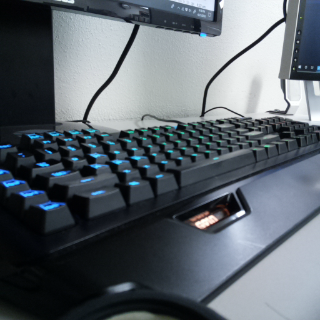

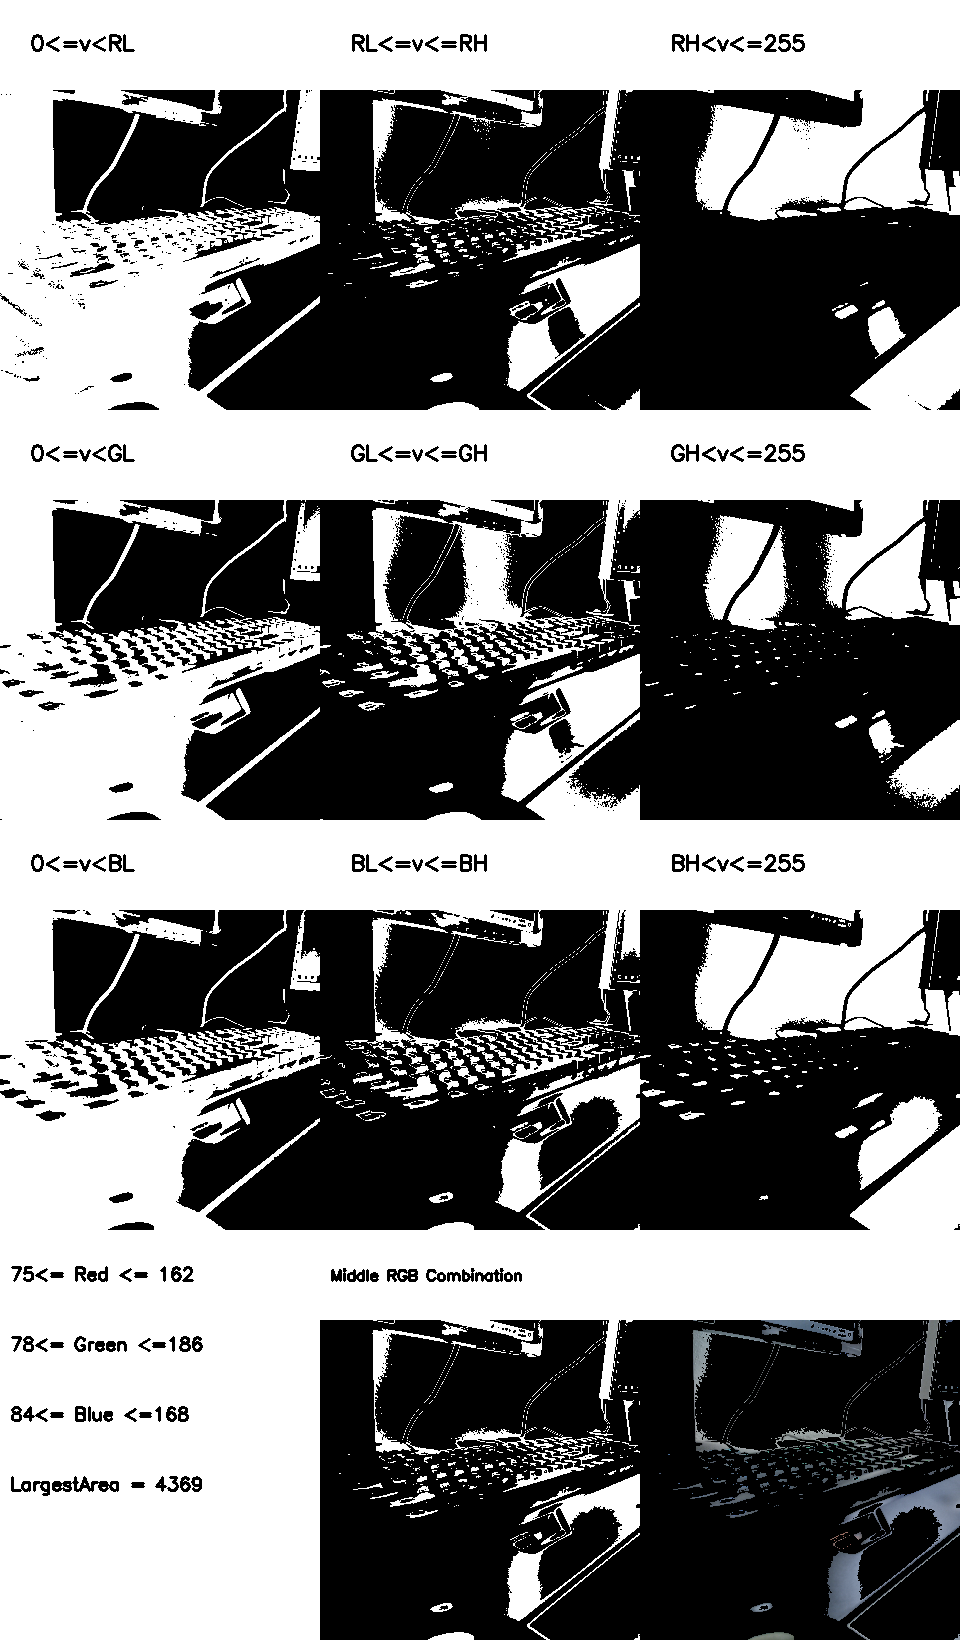

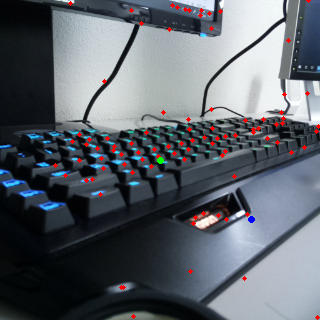

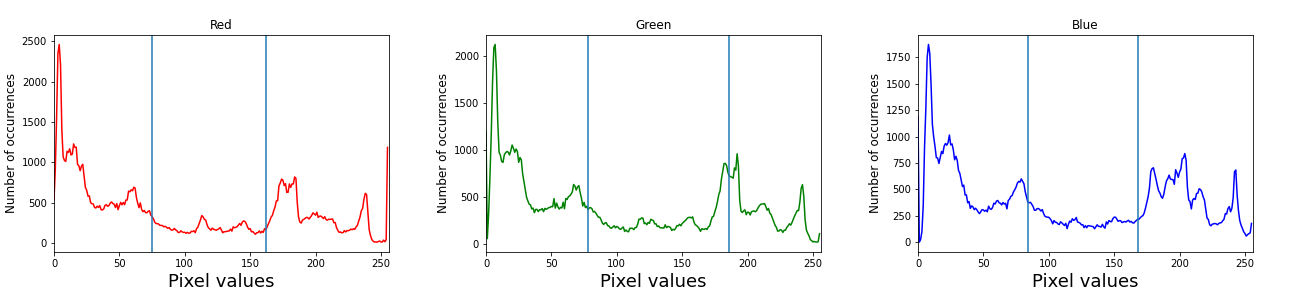

In [4]:
%matplotlib inline
from thresholds2 import *
import AOLMERobots as gopi
import cv2
import numpy as np
import matplotlib.pyplot


image = cv2.imread('my_image.png')
height, width = image.shape[:2]
image= cv2.resize(image, (int(320/width*height), 320))

thr_obj = threshold(image)
cv2_imshow(image)


img = image.copy()
    
#@title Transformation Parameters { run: "auto" }

redLow = 75 #@param {type:"slider", min:0, max:255, step:1}
redHi  = 162 #@param {type:"slider", min:0, max:255, step:6}

greenLow = 78 #@param {type:"slider", min:0, max:255, step:6}
greenHi  = 186 #@param {type:"slider", min:0, max:255, step:6}

blueLow = 84 #@param {type:"slider", min:0, max:255, step:6}
blueHi  = 168 #@param {type:"slider", min:0, max:255, step:6}


rgb_values = [blueLow, blueHi, greenLow, greenHi, redLow, redHi]
    
# Red component processing:
thr_obj.sel_color_comp ('red')
RedLow   =  thr_obj.ThreshLow   (redLow)            
RedRange =  thr_obj.ThreshRange (redLow , redHi)   
RedHi    =  thr_obj.ThreshHigh  (redHi)
    
# Green component processing:
thr_obj.sel_color_comp ('green')
GreenLow   =  thr_obj.ThreshLow   (greenLow)            
GreenRange =  thr_obj.ThreshRange (greenLow , greenHi)  
GreenHi    =  thr_obj.ThreshHigh  (greenHi)
        
# Blue component processing:
thr_obj.sel_color_comp ('blue')
BlueLow   =  thr_obj.ThreshLow   (blueLow)            
BlueRange =  thr_obj.ThreshRange (blueLow , blueHi)   
BlueHi    =  thr_obj.ThreshHigh  (blueHi)             
   
# Generate the second window, including 9 single color images, one combination image, and text
white= np.zeros((90, RedLow.shape[1]), np.uint8)
white[:] = (255)

vcat1 = cv2.vconcat((white, RedLow))
vcat2 = cv2.vconcat((white, RedRange))
vcat3 = cv2.vconcat((white, RedHi))
    
vcat4 = cv2.vconcat((white, GreenLow))
vcat5 = cv2.vconcat((white, GreenRange))
vcat6 = cv2.vconcat((white, GreenHi))
    
vcat7 = cv2.vconcat((white, BlueLow))
vcat8 = cv2.vconcat((white, BlueRange))
vcat9 = cv2.vconcat((white, BlueHi))      

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(vcat1,'0<=v<RL',   (30,50), font, 0.7, (0,0,0), 2, 0)
cv2.putText(vcat2,'RL<=v<=RH', (30,50), font, 0.7, (0,0,0), 2, 0)
cv2.putText(vcat3,'RH<v<=255', (30,50), font, 0.7, (0,0,0), 2, 0)
cv2.putText(vcat4,'0<=v<GL',   (30,50), font, 0.7, (0,0,0), 2, 0)
cv2.putText(vcat5,'GL<=v<=GH', (30,50), font, 0.7, (0,0,0), 2, 0)
cv2.putText(vcat6,'GH<v<=255', (30,50), font, 0.7, (0,0,0), 2, 0)
cv2.putText(vcat7,'0<=v<BL',   (30,50), font, 0.7, (0,0,0), 2, 0)
cv2.putText(vcat8,'BL<=v<=BH', (30,50), font, 0.7, (0,0,0), 2, 0)
cv2.putText(vcat9,'BH<v<=255', (30,50), font, 0.7, (0,0,0), 2, 0)

red_all = np.hstack((vcat1, vcat2, vcat3))
green_all = np.hstack((vcat4, vcat5, vcat6))
blue_all = np.hstack((vcat7, vcat8, vcat9))
    
rgb_all = np.vstack((red_all, green_all, blue_all))

# Get middle-RGB combination
comb_image, comb_allTh= thr_combination(img, BlueRange,GreenRange, RedRange).return_result()   
    
# Mark conter of color regions
red_min_max = [redLow, redHi]
grn_min_max = [greenLow, greenHi]
blu_min_max = [blueLow, blueHi]
    
x,y,max_area = gopi.get_img_object_center(img, red_min_max, grn_min_max, blu_min_max)
white_2= np.zeros((90+RedLow.shape[0], RedLow.shape[1]), np.uint8)
white_2[:] = (255)  

cv2.putText(white_2, str(redLow) +'<= Red <= '+str(redHi),(10,50), font, 0.6,(0,0,0), 2, 0)
cv2.putText(white_2, str(greenLow)+ '<= Green <='+str(greenHi),(10,120), font, 0.6,(0,0,0), 2, 0)
cv2.putText(white_2, str(blueLow) +'<= Blue <='+str(blueHi),(10, 190), font, 0.6,(0,0,0), 2, 0)
cv2.putText(white_2,'LargestArea = '+str(int(max_area)),(10,260), font, 0.6,(0,0,0), 2, 0)
    
plot_1 = np.vstack((white, comb_allTh*255))

cv2.putText(plot_1,'Middle RGB Combination',(10,50), font, 0.5,(0,0,0), 2, 0)
plot_2 = np.hstack((white_2, plot_1))
    
plot_2_3_channel = cv2.merge((plot_2, plot_2, plot_2))  
rgb_all_3_channel = cv2.merge((rgb_all, rgb_all, rgb_all))
white_3_channel = cv2.merge((white, white, white))
    
plot_3 = np.vstack((white_3_channel, comb_image))
plot_4 = np.hstack((plot_2_3_channel, plot_3))
plot_5 = np.vstack((rgb_all_3_channel, plot_4))
    
    
cv2_imshow(plot_5)
cv2.circle(img, (int(image.shape[0]/2), int(image.shape[1]/2)),2,(0,255,0),2)
cv2_imshow(img)

# Show histograms for RGB color
gopi.show_RGB_hist(img, rgb_values)

